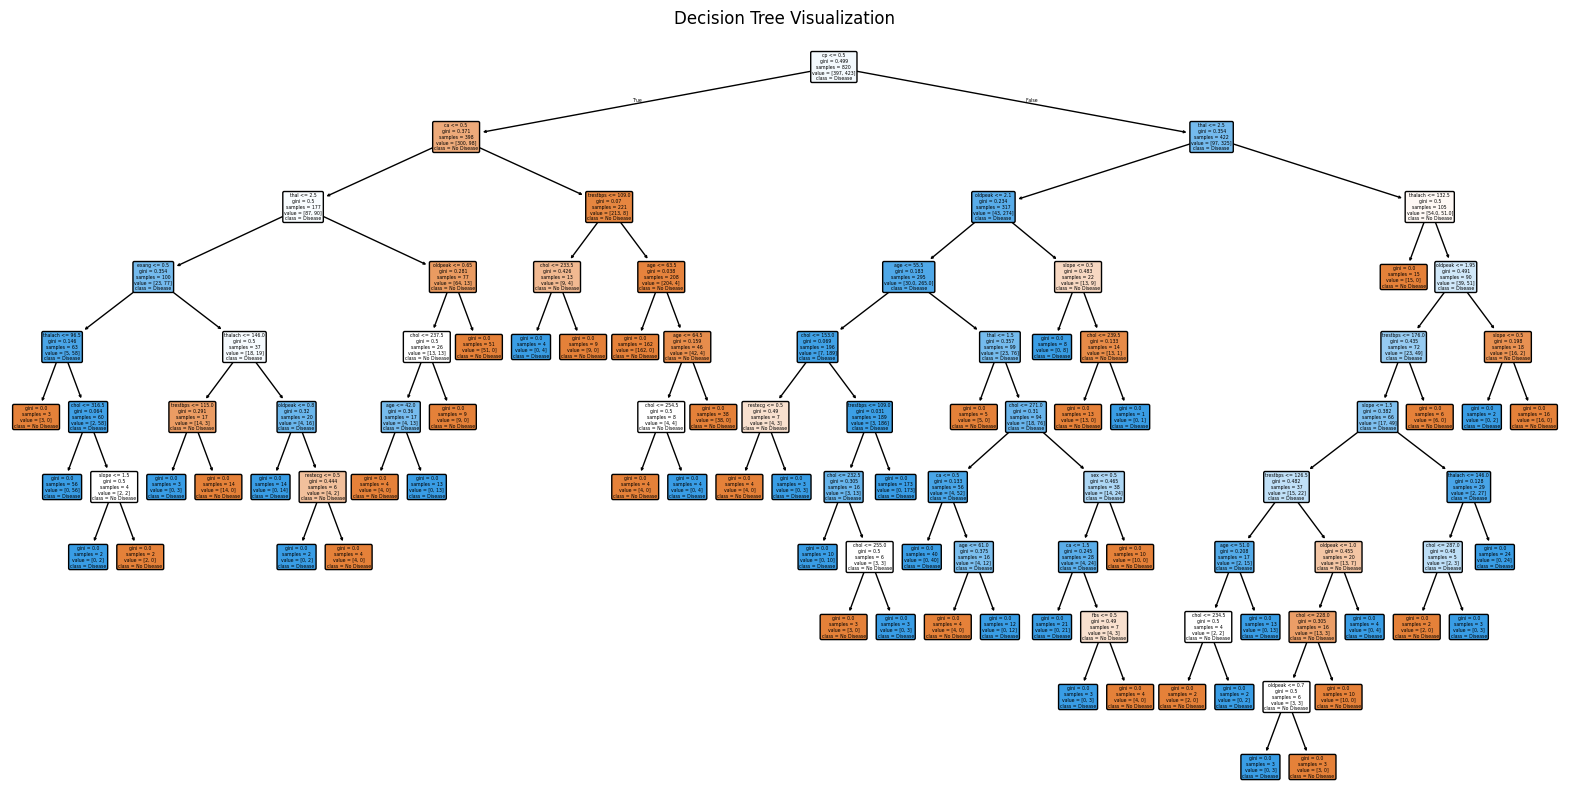

In [10]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("C:/Users/lenov/Downloads/heart.csv")
X = df.drop('target', axis=1)
y = df['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train decision tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Visualize tree
plt.figure(figsize=(20, 10))
plot_tree(dt, 
          feature_names=X.columns, 
          class_names=['No Disease', 'Disease'],
          filled=True, 
          rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

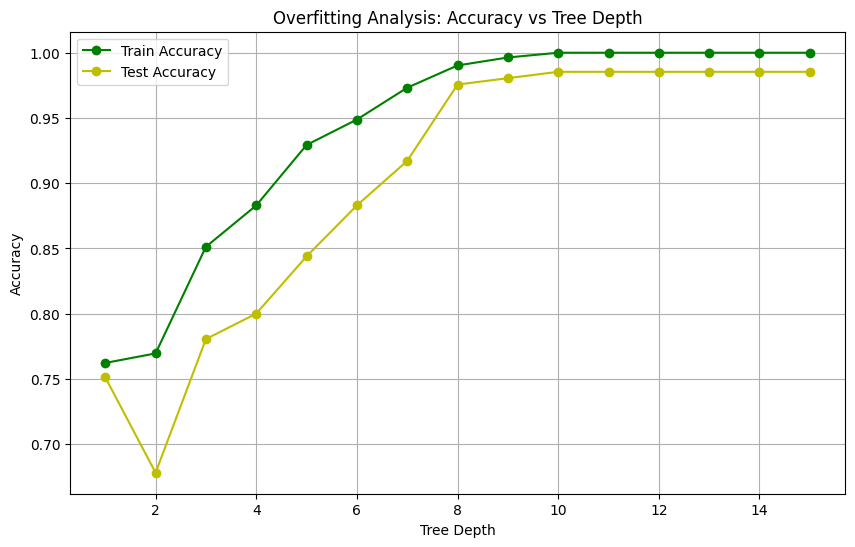

Optimal depth: 10 (Test accuracy: 0.99)


In [11]:
# Evaluate different tree depths
depths = range(1, 16)
train_scores = []
test_scores = []

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    train_scores.append(dt.score(X_train, y_train))
    test_scores.append(dt.score(X_test, y_test))

# Plot accuracy vs depth
plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, 'go-', label='Train Accuracy')
plt.plot(depths, test_scores, 'yo-', label='Test Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Overfitting Analysis: Accuracy vs Tree Depth')
plt.legend()
plt.grid()
plt.show()

# Optimal depth selection
optimal_depth = depths[test_scores.index(max(test_scores))]
print(f"Optimal depth: {optimal_depth} (Test accuracy: {max(test_scores):.2f})")

In [5]:
from sklearn.ensemble import RandomForestClassifier

# Train random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Compare performance
dt_optimal = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
dt_optimal.fit(X_train, y_train)

print("Decision Tree Accuracy:")
print(f"Train: {dt_optimal.score(X_train, y_train):.3f}")
print(f"Test: {dt_optimal.score(X_test, y_test):.3f}\n")

print("Random Forest Accuracy:")
print(f"Train: {rf.score(X_train, y_train):.3f}")
print(f"Test: {rf.score(X_test, y_test):.3f}")

Decision Tree Accuracy:
Train: 1.000
Test: 0.985

Random Forest Accuracy:
Train: 1.000
Test: 0.985


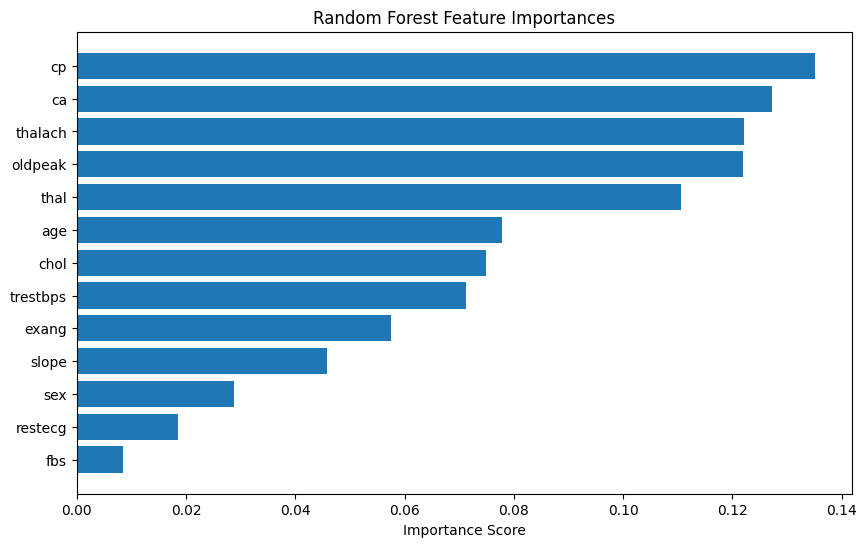

Top 5 Features:
    Feature  Importance
2        cp    0.135072
11       ca    0.127327
7   thalach    0.122169
9   oldpeak    0.121905
12     thal    0.110518


In [6]:
# Get feature importances
importances = rf.feature_importances_
feature_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.xlabel('Importance Score')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()
plt.show()

print("Top 5 Features:")
print(feature_df.head(5))

Decision Tree CV Accuracy:
Mean: 1.000 | Std: 0.000

Random Forest CV Accuracy:
Mean: 0.997 | Std: 0.006


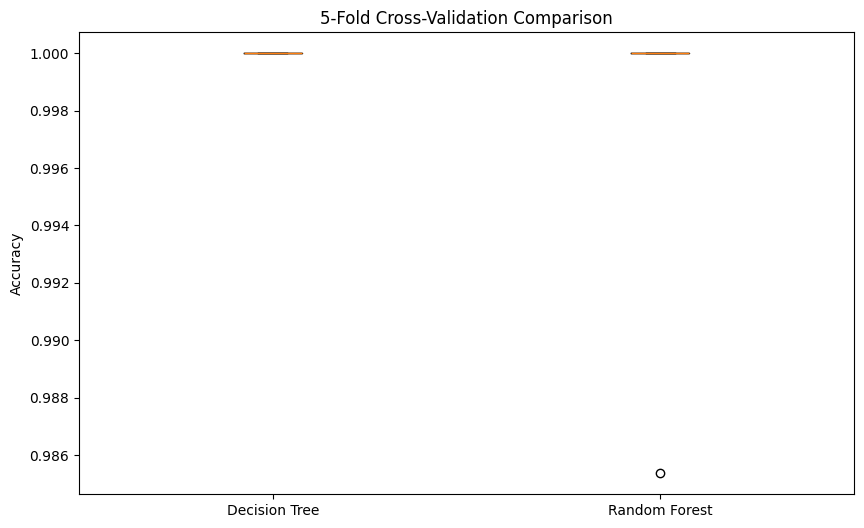

In [8]:
from sklearn.model_selection import cross_val_score

# 5-fold cross-validation
dt_scores = cross_val_score(dt_optimal, X, y, cv=5)
rf_scores = cross_val_score(rf, X, y, cv=5)

print("Decision Tree CV Accuracy:")
print(f"Mean: {dt_scores.mean():.3f} | Std: {dt_scores.std():.3f}")

print("\nRandom Forest CV Accuracy:")
print(f"Mean: {rf_scores.mean():.3f} | Std: {rf_scores.std():.3f}")

# Visualize CV results
plt.figure(figsize=(10, 6))
plt.boxplot([dt_scores, rf_scores], tick_labels=['Decision Tree', 'Random Forest'])
plt.ylabel('Accuracy')
plt.title('5-Fold Cross-Validation Comparison')
plt.show()